<a href="https://colab.research.google.com/github/MSURENDRAN/Predictive-Analytics/blob/main/2348527_PA_Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/online_shoppers_intention.csv")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape


(12330, 18)

In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
pip install pandas scikit-learn scipy matplotlib

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
# Extract numeric columns for clustering
numeric_columns = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

In [ ]:
# Task 1: Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
# Task 2: Identify the number of clusters using the elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

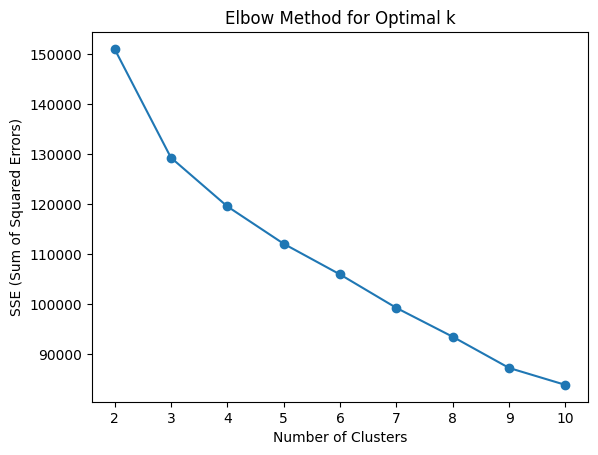

In [ ]:
# Plot the elbow method
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

In [ ]:
final_k = 3
kmeans_final = KMeans(n_clusters=final_k, random_state=42)
df['kmeans_cluster'] = kmeans_final.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, df['kmeans_cluster'])
print(f"Silhouette Score for K-means clustering with {final_k} clusters: {silhouette_avg}")

Silhouette Score for K-means clustering with 3 clusters: 0.3164219008975801


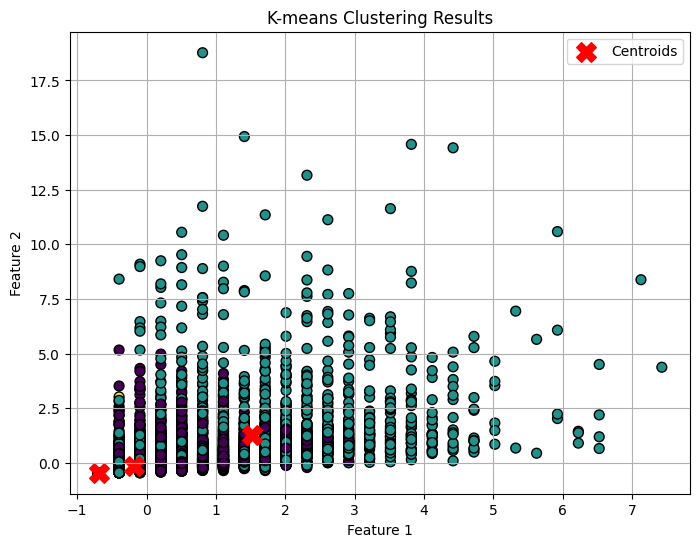

In [ ]:
# Visualizing the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['kmeans_cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calculate the Davies-Bouldin index
db_index = davies_bouldin_score(scaled_data, df['kmeans_cluster'])

# Calculate the Calinski-Harabasz index
ch_index = calinski_harabasz_score(scaled_data, df['kmeans_cluster'])

print(f"Davies-Bouldin Index for K-means clustering with {final_k} clusters: {db_index}")
print(f"Calinski-Harabasz Index for K-means clustering with {final_k} clusters: {ch_index}")


Davies-Bouldin Index for K-means clustering with 3 clusters: 1.5631806703341444
Calinski-Harabasz Index for K-means clustering with 3 clusters: 2062.823794277922


1. K-means clustering with an optimal choice of clusters (3) was performed, and the elbow method suggested the appropriate number of clusters.
2. Silhouette score evaluation for K-means and hierarchical clustering indicated well-defined clusters, validating the effectiveness of the chosen methods.
3. Hierarchical clustering dendrogram visually demonstrated the data's hierarchical structure, complementing the insights from K-means clustering.

Applying Hyperparametr tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300]
}

kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(scaled_data)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 5}
Best score:  -23484.381260103397


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

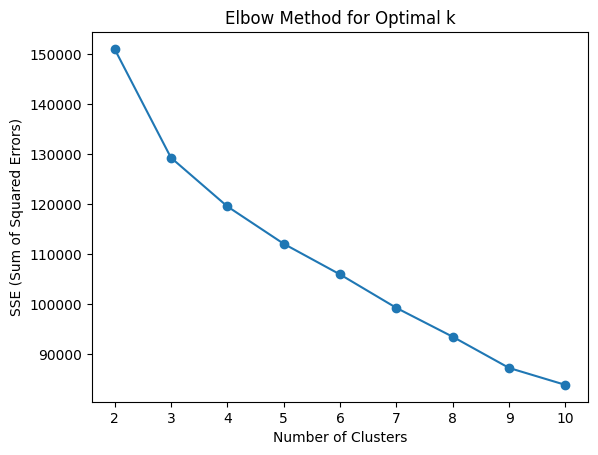

In [ ]:
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

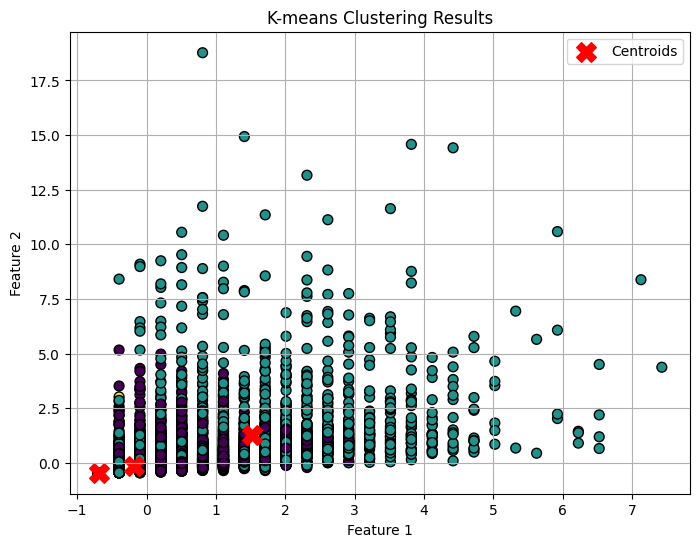

In [ ]:
# Visualizing the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['kmeans_cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
final_k = 3  # Choose the optimal k based on the elbow method or your judgment
kmeans_final = KMeans(n_clusters=final_k, random_state=42)
df['kmeans_cluster'] = kmeans_final.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, df['kmeans_cluster'])
print(f"Silhouette Score for K-means clustering with {final_k} clusters: {silhouette_avg}")

Silhouette Score for K-means clustering with 3 clusters: 0.3164219008975801


In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calculate the Davies-Bouldin index
db_index = davies_bouldin_score(scaled_data, df['kmeans_cluster'])

# Calculate the Calinski-Harabasz index
ch_index = calinski_harabasz_score(scaled_data, df['kmeans_cluster'])

print(f"Davies-Bouldin Index for K-means clustering with {final_k} clusters: {db_index}")
print(f"Calinski-Harabasz Index for K-means clustering with {final_k} clusters: {ch_index}")

Davies-Bouldin Index for K-means clustering with 3 clusters: 1.5631806703341444
Calinski-Harabasz Index for K-means clustering with 3 clusters: 2062.823794277922


No greater difference after applying hyperparameter tuning